# Part 1: Collection of Data

### Data Details:

###### In the Data there are 5 columns 
 1. District
 2. Crop
 3. Area
 4. Production
 5. Yield

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df_yield = pd.read_csv('Yield_Data.csv')
df_yield.shape

(6072, 5)

In [3]:
df_yield

,District,Crop,Area,Production,Yield
0,Ahmedabad,GNUT,608.0,229,377
1,Ahmedabad,GNUT,653.0,407,622
2,Ahmedabad,GNUT,652.0,301,461
3,Ahmedabad,GNUT,499.0,341,683
4,Ahmedabad,GNUT,396.0,192,486
...,...,...,...,...,...
6067,Surendranagar,WHEAT,255.0,524,2055
6068,Surendranagar,WHEAT,353.0,775,2195
6069,Surendranagar,WHEAT,324.0,731,2256
6070,Surendranagar,WHEAT,410.0,1193,2910


In [4]:
df_yield.tail()

,District,Crop,Area,Production,Yield
6067,Surendranagar,WHEAT,255.0,524,2055
6068,Surendranagar,WHEAT,353.0,775,2195
6069,Surendranagar,WHEAT,324.0,731,2256
6070,Surendranagar,WHEAT,410.0,1193,2910
6071,Surendranagar,WHEAT,365.0,867,2375


In [5]:
df_yield.describe()

,Area,Production,Yield
count,6072.000000,6072.000000,6072.000000
mean,521.207386,543.570323,885.909914
std,808.437218,1088.437109,738.491945
min,0.250000,1.000000,3.000000
25%,47.000000,26.000000,308.000000
50%,198.000000,171.000000,658.000000
75%,634.000000,591.250000,1265.000000
max,4632.000000,15388.000000,4700.000000


In [6]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   District    6072 non-null   object 
 1   Crop        6072 non-null   object 
 2   Area        6072 non-null   float64
 3   Production  6072 non-null   int64  
 4   Yield       6072 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 237.3+ KB


In [7]:
df_yield.isnull().sum()

District      0
Crop          0
Area          0
Production    0
Yield         0
dtype: int64

# Part 2: Data Exploration

In [8]:
df_yield.groupby('Crop').count()

,District,Area,Production,Yield
Crop,,,,
BAJRA,833,833,833,833
CASTOR,831,831,831,831
COTTON,833,833,833,833
GNUT,931,931,931,931
JOWAR,880,880,880,880
SESAMUM,833,833,833,833
WHEAT,931,931,931,931


In [9]:
df_yield.groupby('District').count()

,Crop,Area,Production,Yield
District,,,,
Ahmedabad,343,343,343,343
Amreli,343,343,343,343
Banaskantha,343,343,343,343
Bharuch,343,343,343,343
Bhavnagar,343,343,343,343
Dang,147,147,147,147
Gandhinagar,294,294,294,294
Jamnagar,343,343,343,343
Junagadh,343,343,343,343


In [10]:
df_yield.describe()

,Area,Production,Yield
count,6072.000000,6072.000000,6072.000000
mean,521.207386,543.570323,885.909914
std,808.437218,1088.437109,738.491945
min,0.250000,1.000000,3.000000
25%,47.000000,26.000000,308.000000
50%,198.000000,171.000000,658.000000
75%,634.000000,591.250000,1265.000000
max,4632.000000,15388.000000,4700.000000


In [11]:
df_yield['District'].nunique()

19

In [12]:
df_yield.groupby(['District'],sort=True)['Yield'].sum().nlargest(20)

District
Junagadh         381755
Mehsana          328192
Kheda            316706
Gandhinagar      316118
Surat            315956
Amreli           314417
Vadodara         308308
Rajkot           307094
Bhavnagar        295964
Sabarkantha      290312
Banaskantha      287205
Panchmahal       286447
Kutchh           277101
Jamnagar         273328
Bharuch          259590
Surendranagar    246455
Ahmedabad        235996
Valsad           176487
Dang             161814
Name: Yield, dtype: int64

From above details we can see that junagadh has the highest yield production.

In [13]:
df_yield.groupby(['Crop','District'],sort=True)['Yield'].sum().nlargest(25)

Crop    District     
WHEAT   Junagadh         134531
        Mehsana          115396
        Gandhinagar      113867
        Rajkot           113665
        Amreli           109452
        Kutchh           107971
        Banaskantha      100955
        Vadodara          97255
        Jamnagar          96471
        Sabarkantha       93611
        Valsad            93605
        Bhavnagar         93275
        Surat             84495
        Kheda             84074
        Dang              82989
        Panchmahal        82853
        Surendranagar     77230
CASTOR  Rajkot            69835
        Surendranagar     63892
BAJRA   Junagadh          63689
CASTOR  Banaskantha       62936
        Mehsana           62794
        Gandhinagar       62522
        Bharuch           61281
        Bhavnagar         61210
Name: Yield, dtype: int64

From above details we can say that Junagadh has the highest production of Wheat and Bajra.
Rajkot has the highest production of Castor and so on...

In [14]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

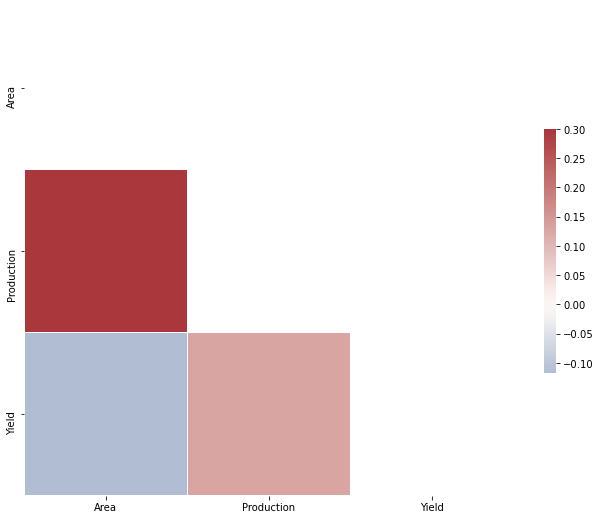

In [15]:
correlation_data=df_yield.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Part 3: Data Preprocessing

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.  

In [16]:
df_yield.head()

,District,Crop,Area,Production,Yield
0,Ahmedabad,GNUT,608.0,229,377
1,Ahmedabad,GNUT,653.0,407,622
2,Ahmedabad,GNUT,652.0,301,461
3,Ahmedabad,GNUT,499.0,341,683
4,Ahmedabad,GNUT,396.0,192,486


### Encoding Categorical Variables:
There are two categorical columns in the dataframe, categorical data are variables that contain label values rather than numeric values. The number of possible values is often limited to a fixed set, like in this case, items and countries values.
Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

This means that categorical data must be converted to a numerical form. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. For that purpose, One-Hot Encoding will be used to convert these two columns to one-hot numeric array.

The categorical value represents the numerical value of the entry in the dataset. This encoding will create a binary column for each category and returns a matrix with the results. 

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
yield_df_onehot = pd.get_dummies(df_yield, columns=['District',"Crop"], prefix = ['District',"Crop"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Yield']
label=df_yield['Yield']
features

,Area,Production,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,District_Jamnagar,...,District_Surendranagar,District_Vadodara,District_Valsad,Crop_BAJRA,Crop_CASTOR,Crop_COTTON,Crop_GNUT,Crop_JOWAR,Crop_SESAMUM,Crop_WHEAT
0,608.0,229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,653.0,407,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,652.0,301,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,499.0,341,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,396.0,192,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,255.0,524,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6068,353.0,775,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6069,324.0,731,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6070,410.0,1193,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [19]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Area                    6072 non-null   float64
 1   Production              6072 non-null   int64  
 2   District_Ahmedabad      6072 non-null   uint8  
 3   District_Amreli         6072 non-null   uint8  
 4   District_Banaskantha    6072 non-null   uint8  
 5   District_Bharuch        6072 non-null   uint8  
 6   District_Bhavnagar      6072 non-null   uint8  
 7   District_Dang           6072 non-null   uint8  
 8   District_Gandhinagar    6072 non-null   uint8  
 9   District_Jamnagar       6072 non-null   uint8  
 10  District_Junagadh       6072 non-null   uint8  
 11  District_Kheda          6072 non-null   uint8  
 12  District_Kutchh         6072 non-null   uint8  
 13  District_Mehsana        6072 non-null   uint8  
 14  District_Panchmahal     6072 non-null   

In [20]:
features.head()

,Area,Production,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,District_Jamnagar,...,District_Surendranagar,District_Vadodara,District_Valsad,Crop_BAJRA,Crop_CASTOR,Crop_COTTON,Crop_GNUT,Crop_JOWAR,Crop_SESAMUM,Crop_WHEAT
0,608.0,229,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,653.0,407,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,652.0,301,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,499.0,341,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,396.0,192,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0



### Scaling Features: 

Taking a look at the dataset above, it contains features highly varying in magnitudes, units and range. The features with high magnitudes will weigh in a lot more in the distance calculations than features with low magnitudes.

To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [22]:
features

array([[0.1312139 , 0.0148177 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14092945, 0.02638591, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14071355, 0.01949698, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.06989799, 0.04744265, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08846548, 0.07746799, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.07874993, 0.05628128, 0.        , ..., 0.        , 0.        ,
        1.        ]])

## Training Data: 

The dataset will be split to two datasets, the training dataset and test dataset. The data is usually tend to be split inequality because training the model usually requires as much data-points as possible.The common splits are 70/30 or 80/20 for train/test.

The training dataset is the intial dataset used to train ML algorithm to learn and produce right predictions. (70% of dataset is training dataset)

The test dataset, however, is used to assess how well ML algorithm is trained with the training dataset. You can’t simply reuse the training dataset in the testing stage because ML algorithm will already “know” the expected output, which defeats the purpose of testing the algorithm. (30% of dataset is testing dataset) 



In [23]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [24]:
df_yield.to_csv('yield_df.csv')

In [25]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

# Part 4: Model Comparision & Selection

Before deciding on an algorithem to use, first we need to evaluate, compare and choose the best one that fits this specific dataset.

Usually, when working on a machine learning problem with a given dataset, we try different models and techniques to solve an optimization problem and fit the most accurate model, that will neither overfit nor underfit the model. 
 
For this project, we'll compare between the following models : 

- Gradient Boosting Regressor
- Random Forest Regressor
- SVM 
- Decision Tree Regressor


In [26]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=600, max_depth=4, random_state=0),
    RandomForestRegressor(n_estimators=600, max_depth=5, random_state=0),
    svm.SVR(),
    DecisionTreeRegressor()
]

In [28]:
model_train=list(map(compare_models,models)) 

In [29]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9136759451755192]
['RandomForestRegressor', 0.7125186112714956]
['SVR', 0.05972840646004007]
['DecisionTreeRegressor', 0.8383326626892471]




From results viewd above, **Gradient Boosting Regressor** has the highest R^2 score 0f **91.3%**, **Decision Tree Regressor** comes second. 
 

In [30]:
yield_df_onehot

,Area,Production,Yield,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,...,District_Surendranagar,District_Vadodara,District_Valsad,Crop_BAJRA,Crop_CASTOR,Crop_COTTON,Crop_GNUT,Crop_JOWAR,Crop_SESAMUM,Crop_WHEAT
0,608.0,229,377,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,653.0,407,622,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,652.0,301,461,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,499.0,341,683,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,396.0,192,486,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,255.0,524,2055,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6068,353.0,775,2195,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6069,324.0,731,2256,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6070,410.0,1193,2910,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [31]:
test_data

array([[1.04442165e-01, 6.70696042e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.57170616e-02, 9.94345876e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [9.55902197e-02, 4.55579385e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.75273925e-03, 5.84909339e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.40281751e-01, 1.01644245e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.69584930e-03, 5.84909339e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [32]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

district=test_df[[col for col in test_df.columns if 'District' in col]].stack()[test_df[[col for col in test_df.columns if 'District' in col]].stack()>0]
districtlist=list(pd.DataFrame(district).index.get_level_values(1))
districts=[i.split("_")[1] for i in districtlist]
itm=test_df[[col for col in test_df.columns if 'Crop' in col]].stack()[test_df[[col for col in test_df.columns if 'Crop' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [33]:
test_df.head()

,Area,Production,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,District_Jamnagar,...,District_Surendranagar,District_Vadodara,District_Valsad,Crop_BAJRA,Crop_CASTOR,Crop_COTTON,Crop_GNUT,Crop_JOWAR,Crop_SESAMUM,Crop_WHEAT
0,0.104442,0.067070,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.045717,0.009943,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.095590,0.045558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.005775,0.002730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000378,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
test_df.drop([col for col in test_df.columns if 'Crop' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'State' in col],axis=1,inplace=True)
test_df.head()

,Area,Production,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,District_Jamnagar,...,District_Kheda,District_Kutchh,District_Mehsana,District_Panchmahal,District_Rajkot,District_Sabarkantha,District_Surat,District_Surendranagar,District_Vadodara,District_Valsad
0,0.104442,0.067070,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.045717,0.009943,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095590,0.045558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005775,0.002730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000378,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
test_df['District']=districts
test_df['Crop']=items
test_df

,Area,Production,District_Ahmedabad,District_Amreli,District_Banaskantha,District_Bharuch,District_Bhavnagar,District_Dang,District_Gandhinagar,District_Jamnagar,...,District_Mehsana,District_Panchmahal,District_Rajkot,District_Sabarkantha,District_Surat,District_Surendranagar,District_Vadodara,District_Valsad,District,Crop
0,0.104442,0.067070,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Banaskantha,WHEAT
1,0.045717,0.009943,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bharuch,WHEAT
2,0.095590,0.045558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Kutchh,COTTON
3,0.005775,0.002730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Junagadh,CASTOR
4,0.000378,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dang,WHEAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,0.145032,0.021187,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bharuch,JOWAR
1818,0.023479,0.008384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Vadodara,CASTOR
1819,0.002753,0.000585,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dang,GNUT
1820,0.140282,0.101644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Sabarkantha,WHEAT


In [36]:
clf=GradientBoostingRegressor(n_estimators=600, max_depth=5, random_state=0)
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["Yield"].tolist()
test_group=test_df.groupby("Crop")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Crop
BAJRA      0.917123
CASTOR     0.875530
COTTON     0.823354
GNUT       0.840673
JOWAR      0.852299
SESAMUM    0.679571
WHEAT      0.671476
dtype: float64

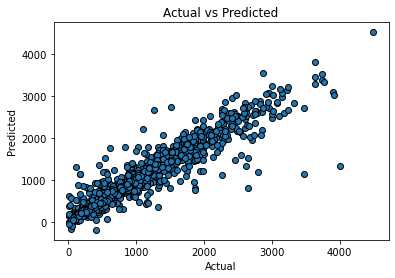

In [37]:
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [38]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Crop
BAJRA      0.907954
CASTOR     0.860120
COTTON     0.803557
GNUT       0.825664
JOWAR      0.834270
SESAMUM    0.640641
WHEAT      0.637715
dtype: float64

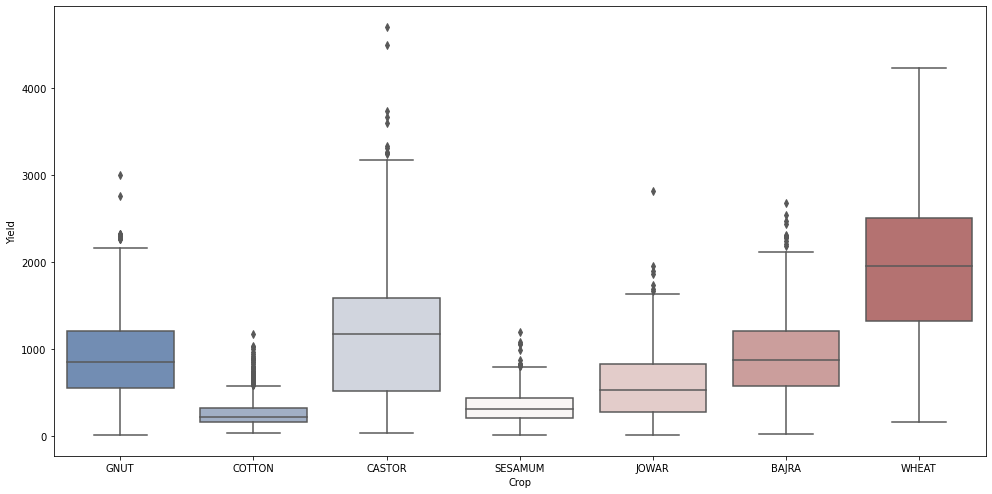

In [39]:
#Boxplot that shows yield for each item 
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Crop",y="Yield",palette="vlag",data=df_yield,ax=ax);